# Приоритизация гипотез по увеличению выручки в интернет-магазине, анализ A/B-теста

Необходимо приоритизировать гипотезы, подготовленные с отделом маркетинга для увеличения выручки крупного интернет-магазина. Во второй части проекта необходимо проанализировать результаты A/B-теста.

**Часть 1.** В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`. Необходимо применить фреймворки `ICE` и `RICE` для приоритизации гипотез. 

**Часть 2.** Был проведен A/B-тест и получены результаты, которые описаны в файлах `orders.csv` и `visitors.csv`. Необходимо проанализировать результаты A/B-теста.

**Задачи:**

1. Часть 1. Выявить наиболее приоритетные гипотезы с помощью фреймворков ICE и RICE. Определить, почему итоговые результаты для фреймворков различаются.


2. Часть 2:

* Проанализировать различия в кумулятивных характеристиках для групп A и B.
* Выбрать границы аномальных значений для количества заказов на пользователя и для среднего чека заказа.
* Выявить, есть ли статистически значимые различия в среднем количестве заказов на пользователя между группами A и B по «сырым» данным и по «очищенным» данным.
* Выявить, есть ли статистически значимые различия в среднем чеке заказа между группами A и B по «сырым» данным и по «очищенным» данным.
* Принять решение по результатам теста.

# План исследования:

**1. Обзор и предобратка данных**

**2. Приоритизация гипотез методом ICE и RICE.**

**3. Анализ A/B-теста:**

**3.1** Анализ кумулятивной выручки по группам A и B.

**3.2** Анализ кумулятивного среднего чека по группам.

**3.3** Анализ относительного изменения кумулятивного среднего чека группы B к группе A.

**3.4** Анализ кумулятивной конверсии по группам.

**3.5** Анализа относительного изменения кумулятивной конверсии группы B к группе A.

**3.6** Выбор границы аномальных значений для количества заказов на пользователя и для среднего чека заказа.

**3.7** Расчет статистической значимости различий в среднем количестве заказов между группами по «сырым» данным.

**3.8** Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

**3.9** Расчет статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным.

**3.10** Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

### Обзор и предобработка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [4]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [5]:
display(hypothesis.head(5))
print()
display(orders.head(5))
print()
visitors.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
print(hypothesis.info())
print()
print(orders.info())
print()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 col

**Скорректируем названия столбцов.**

In [7]:
hypothesis = hypothesis.rename(str.lower, axis='columns')
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
print(hypothesis.columns, orders.columns, sep='\n')

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


**В данных по заказам и визитам приведем даты к типу datetime.**

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

**Проверим, соответствует ли период в таблице с заказами периоду в таблице  с визитами.**

In [9]:
print(orders['date'].min(), orders['date'].max())
print()
print(visitors['date'].min(), visitors['date'].max())

2019-08-01 00:00:00 2019-08-31 00:00:00

2019-08-01 00:00:00 2019-08-31 00:00:00


**Проверим, есть ли в данных дубликаты.**

In [10]:
print(orders.duplicated().sum())
visitors.duplicated().sum()

0


0

Дубликатов в данных нет.

**Проверим, не оказался ли один и тот же пользователь в двух группах.**

In [11]:
buyers_A = pd.Series(orders[orders['group'] == 'A']['visitor_id'].unique(), name='visitor_id')
buyers_B = pd.Series(orders[orders['group'] == 'B']['visitor_id'].unique(), name='visitor_id')
visitors_unique = pd.concat([buyers_A, buyers_B], axis=0)
print(len(buyers_A), len(buyers_B))
print(f'Количество пользователей, попавших в обе группы: {visitors_unique.duplicated().sum()}')

503 586
Количество пользователей, попавших в обе группы: 58


В данных с заказами есть 58 пользователей, которые попали сразу в две группы, что составляет около 5% от общего числа пользователей. Так как сопоставить этих пользователей с пользователями из таблицы visitors не получится, удалять их не будем.

### Часть 1. Приоритизация гипотез

#### Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [12]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 3)
hypothesis.sort_values(by='ICE', ascending=False)


,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000


**Вывод:**

Наиболее перспективной оказалась гипотеза: `Запустить акцию, дающую скидку на товар в день рождения`. В тройку также вошли гипотезы: `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей` и `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`. Им соответсвуют порядковые номера 8, 0 и 7.

#### Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [13]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False)
pd.options.display.max_colwidth = 1
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2


**Вывод:**

В данном случае на первом месте с большим отрывом оказалась гипотеза: `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`, которая по показателю ICE была на 3-ем месте. Далее идут гипотезы с порядковым номерами 2, 0 и 6. На перестановку в приоритизации гипотез повлиял показатель reach, который в 7 гипотезе имеет максимальную оценку, то есть применение данных изменений охватит всех возможных пользователей, в 8 гипотезе, напротив, охват минимальный.

### Часть 2. Анализ A/B-теста

#### Построим график кумулятивной выручки по группам.

In [14]:
date_groups = orders[['date', 'group']].drop_duplicates()
# считаем кумулятивную выручку, количество заказов и количество посетителей интернет-магазина
orders_aggregated = date_groups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ]
    .agg({'date': 'max', 'group': 'max', 'transaction_id': 'nunique', 'visitor_id': 'nunique', 'revenue': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

visitors_aggregated = date_groups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ]
    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [15]:
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B']

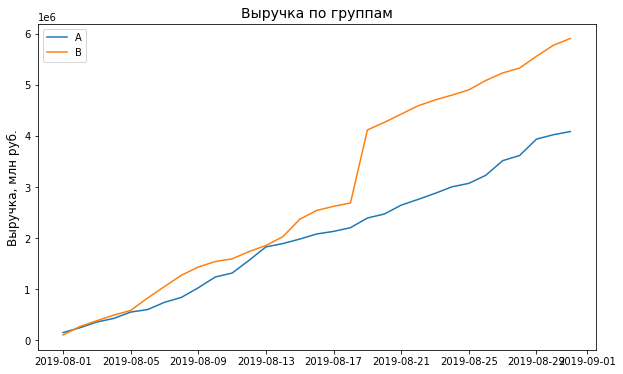

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('Выручка по группам', fontsize=14)
plt.ylabel('Выручка, млн руб.', fontsize=12)
plt.legend();

**Вывод:**

Группа B лидирует в течении всего периода проведения теста. Во второй половине у группы B виден резкий скачок, который возможно связан с наличием аномально больших заказов.

#### Построим график кумулятивного среднего чека по группам.

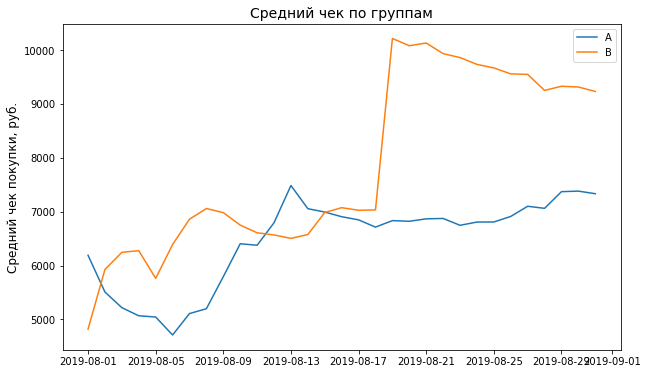

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.title('Средний чек по группам', fontsize=14)
plt.ylabel('Средний чек покупки, руб.', fontsize=12)
plt.legend();

**Вывод:**

Для группы A средний чек в начале теста проседал, но во второй половине стал более равномерным. У группы B в первой половине теста значение колебалось вокруг значения 7 000 руб., но потом произошел резкий скачок по среднему чеку в середине теста, который скорее всего связан с аномально большим заказом. После график идет на спад. 

На данный момент по среднему чеку рано принимать решение, либо необходим дополнительный анадиз выбросов, которые искажают результаты.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [18]:
merged_cumulative_revenue = cumulative_revenue_A.merge(
    cumulative_revenue_B, how='left', left_on=['date'], right_on=['date'], suffixes=['A', 'B'])

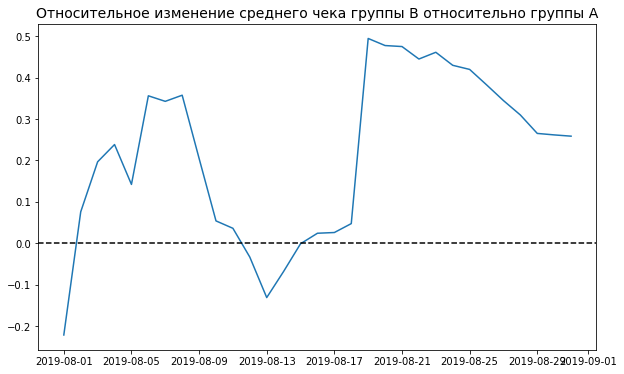

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(merged_cumulative_revenue['date'], 
        (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
        (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение среднего чека группы B относительно группы A', fontsize=14);

**Вывод:**

В середине теста есть резкие скачки в изменениях велечине среднего чека между группами, что еще раз подтверждает наличие аномальных значений в выручке.

#### Построим график кумулятивной конверсии по группам.

In [20]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

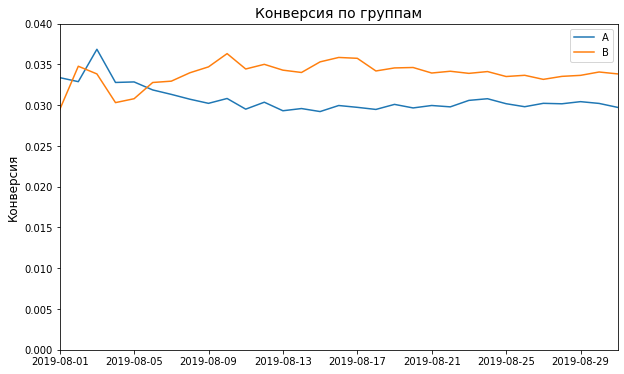

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.title('Конверсия по группам', fontsize=14)
plt.ylabel('Конверсия', fontsize=12)
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04])
plt.legend();

**Вывод:**

В начале теста сегмент A имел большую конверсию, но начиная с 5 августа конверсия сегмента B начала расти и установилась около значения 3,5%, у сегмента A конверсия снизилась и установилась у значения 3%.

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

In [22]:
merged_cumulative_conversions = cumulative_data_A.merge(
    cumulative_data_B, left_on=['date'], right_on=['date'], how='left', suffixes=['A', 'B']
)

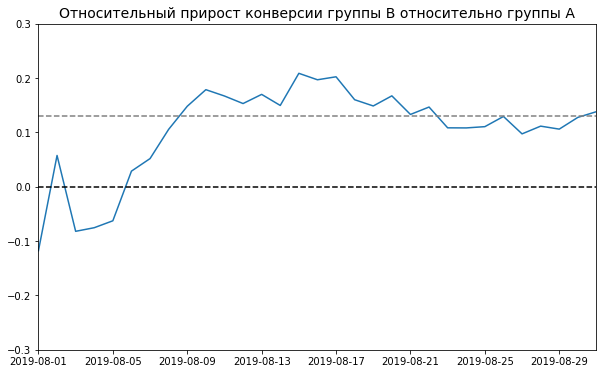

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(merged_cumulative_conversions['date'],
        merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A', fontsize=14)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.3, 0.3]);

**Вывод:**

Практически с самого начала группа B лидирует по конверсии, к середине теста прирост конверсии группы B относительно группы A колеблется у значения в 20%, затем идет немного на спад и к концу теста устанавливается около значения прироста в 13%.

#### Построим точечный график количества заказов по пользователям.

In [24]:
orders_per_visitor = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_per_visitor.columns = ['visitor_id', 'orders']
orders_per_visitor.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


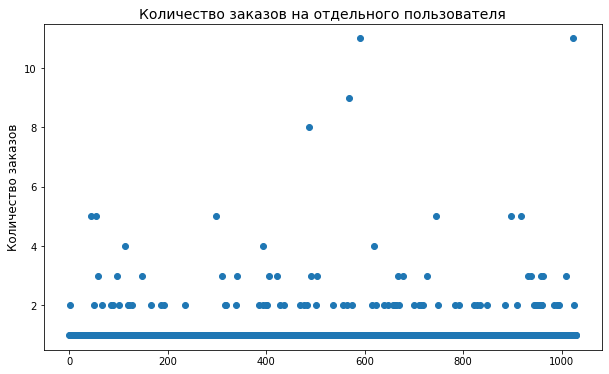

In [25]:
x_values = np.arange(len(orders_per_visitor['orders']))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_per_visitor['orders'])
plt.title('Количество заказов на отдельного пользователя', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12);

**Вывод:**

Большинство пользователей совершали 1 заказ, также есть достаточно большое количество пользователей с 2-3 заказами. В то же время есть пользователи, которые совершали аномально большое число заказов за неделю - 5, 8, 9 и 11 заказов, однако их доля очень мала.

#### Рассчитаем 95-й и 99-й процентили количества заказов на пользователя

In [26]:
print(f'95-й процентиль количества заказов на пользователя = {np.percentile(orders_per_visitor["orders"], 95)}')
print(f'99-й процентиль количества заказов на пользователя = {np.percentile(orders_per_visitor["orders"], 99)}')

95-й процентиль количества заказов на пользователя = 2.0
99-й процентиль количества заказов на пользователя = 4.0


Менее 5% пользователей совершили более двух заказов и менее 1% пользователей совершили более 4 заказов. В дальнейшем количество заказов от 3 и более будем считать аномальными.

#### Построим точечный график стоимостей заказов.

Максимальный заказ: 1,294,500 руб.


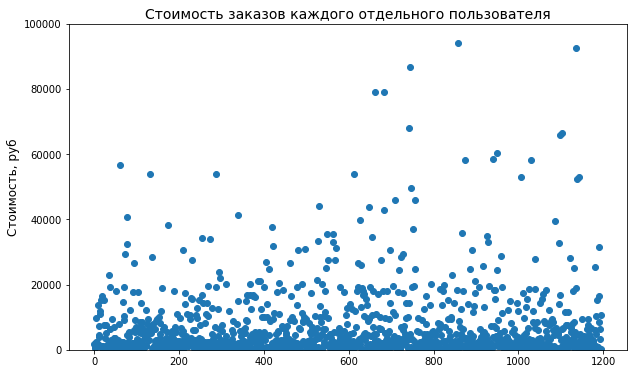

In [27]:
x_values = np.arange(0, len(orders['revenue']))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 0.1e6)
plt.title('Стоимость заказов каждого отдельного пользователя', fontsize=14)
plt.ylabel('Стоимость, руб', fontsize=12);
print(f"Максимальный заказ: {orders['revenue'].max():,.0f} руб.")

**Вывод:**

Основная часть стоимости заказов находится в пределах 30 000 руб., при этом есть аномально большой заказ, который составил более 1,2 млн руб.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [28]:
print(f'95-й процентиль количества заказов на пользователя = {np.percentile(orders["revenue"], 95)}')
print(f'99-й процентиль количества заказов на пользователя = {np.percentile(orders["revenue"], 99)}')

95-й процентиль количества заказов на пользователя = 28000.000000000004
99-й процентиль количества заказов на пользователя = 58233.19999999999


Не более 5% дороже 28 000 руб. и не более 1% дороже 58 233 рублей. Заказы дороже 30 000 руб. будем считать аномально дорогими.

#### Рассчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным, то есть данным с учетом аномальных значений.

Для сравнения двух групп будем использовать непараметрический тест U-критерий Манна-Уитни.

```
H_0: Различий в среднем числе заказов между группами нет
H_1: Различия в среднем числе заказов между группами есть
alpha = 0.05
```


In [29]:
# количество визитов в день для каждой группы
visitors_daily_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitors_per_date_A']
visitors_daily_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitors_per_date_B']

In [30]:
# количество заказов на пользователя для каждой группы
orders_per_visitor_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_per_visitor_A.columns = ['visitor_id', 'orders']

orders_per_visitor_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_per_visitor_B.columns = ['visitor_id', 'orders']

In [31]:
# создадим выборки, где каждый элемент - число заказов определенного пользователя, в том числе ноль
sample_A = pd.concat([
    orders_per_visitor_A['orders'],
    pd.Series(0, index=np.arange(visitors_daily_A['visitors_per_date_A'].sum() \
                                 - len(orders_per_visitor_A['orders'])),
              name='orders')
], axis=0
)

sample_B = pd.concat([
    orders_per_visitor_B['orders'],
    pd.Series(0, index=np.arange(visitors_daily_B['visitors_per_date_B'].sum() \
                                 - len(orders_per_visitor_B['orders'])),
              name='orders')
], axis=0
)

In [32]:
alpha = 0.05
p_value = st.mannwhitneyu(sample_A, sample_B)[1]

if p_value < 0.05:
    print(f"P-value = {p_value:.3f}")
    print('По сырым данным различия в среднем числе заказов в группах A и B оказались статистически значимыми.')
else:
    print(f"P-value = {p_value:.3f}")
    print('По сырым данным различий в среднем числе заказов между группами A и B нет.')

print()
print("Относительный прирост среднего числа заказов на пользователя в группе B относительно группы A составил {0:.1f}%."
      .format((sample_B.mean() / sample_A.mean() - 1) * 100))

P-value = 0.017
По сырым данным различия в среднем числе заказов в группах A и B оказались статистически значимыми.

Относительный прирост среднего числа заказов на пользователя в группе B относительно группы A составил 13.8%.


**Вывод:**

По «сырым» данным различие в среднем числе заказов на одного пользователя в двух группах оказалось статистически значимо. При этом в группе B среднее количество заказов на одного пользователя оказалось больше на 13,8%.

#### Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

В данном случае нулевая и альтернативная гипотезы будут следующими:

```
H_0: Различий в среднем чеке заказа между группами нет
H_1: Различия в среднем чеке заказа между группами есть
alpha = 0.05
```

In [33]:
p_value = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]

if p_value < 0.05:
    print(f"P-value = {p_value:.3f}")
    print('По сырым данным различия в среднем чеке заказа в группах A и B оказались статистически значимыми.')
else:
    print(f"P-value = {p_value:.3f}")
    print('По сырым данным различий в среднем чеке заказа между группами A и B нет.')
    
print()
print("Относительное различие среднего чека в группе B относительно среднего чека заказа в группе A {:.1f}%"
     .format((orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1)*100))

P-value = 0.729
По сырым данным различий в среднем чеке заказа между группами A и B нет.

Относительное различие среднего чека в группе B относительно среднего чека заказа в группе A 25.9%


**Вывод:**

Статистически значимых различий в среднем чеке заказа для групп A и B не обнаружено. Однако средний чек в группе B оказался значительно выше, что скорее всего связано с попаданием аномально больших заказов в выборку.

#### Рассчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным - данным без аномальных значений.

Нулевая и альтернативная гипотезы остаются прежними:

```
H_0: Различий в среднем числе заказов между группами нет
H_1: Различия в среднем числе заказов между группами есть
alpha = 0.05
```

In [34]:
# найдем id пользвателей с аномально большим количеством заказов и аномально большим чеком
users_with_many_orders = pd.concat(
    [
        orders_per_visitor_A[orders_per_visitor_A['orders'] >= 3]['visitor_id'],
        orders_per_visitor_B[orders_per_visitor_B['orders'] >= 3]['visitor_id']
    ],
    axis=0
)

users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']

abnormal_visitors = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormal_visitors.shape[0]

68

In [35]:
# создадим отфильтрованные выборки
sample_filtered_A = pd.concat([
    orders_per_visitor_A[
        np.logical_not(orders_per_visitor_A['visitor_id'].isin(abnormal_visitors))
    ]['orders'],
    pd.Series(0, index=np.arange(visitors_daily_A['visitors_per_date_A'].sum() \
                                 - len(orders_per_visitor_A['orders'])),
              name='orders')
], axis=0
)

sample_filtered_B = pd.concat([
    orders_per_visitor_B[
        np.logical_not(orders_per_visitor_B['visitor_id'].isin(abnormal_visitors))
    ]['orders'],
    pd.Series(0, index=np.arange(visitors_daily_B['visitors_per_date_B'].sum() \
                                 - len(orders_per_visitor_B['orders'])),
              name='orders')
], axis=0
)

In [36]:
p_value = st.mannwhitneyu(sample_filtered_A, sample_filtered_B)[1]

if p_value < 0.05:
    print(f"P-value = {p_value:.3f}")
    print('По сырым данным различия в среднем числе заказов в группах A и B оказались статистически значимыми.')
else:
    print(f"P-value = {p_value:.3f}")
    print('По сырым данным различий в среднем числе заказов между группами A и B нет.')

print()
print("Относительный прирост среднего числа заказов на пользователя в группе B относительно группы A составил {0:.1f}%."
      .format((sample_filtered_B.mean() / sample_filtered_A.mean() - 1) * 100))

P-value = 0.013
По сырым данным различия в среднем числе заказов в группах A и B оказались статистически значимыми.

Относительный прирост среднего числа заказов на пользователя в группе B относительно группы A составил 17.2%.


**Вывод:**

Различия в среднем количестве заказов между группами остались статистически значимыми. По сравнению с сырыми данными вырос относительный прирост числа заказов в группе B относительно группы A, теперь он составляет 17,2%.

#### Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая и альтернативнаягипотезы остаются прежними:

```
H_0: Различий в среднем чеке заказа между группами нет
H_1: Различия в среднем чеке заказа между группами есть
alpha = 0.05
```

In [37]:
orders_filtered = orders[np.logical_not(orders['visitor_id'].isin(abnormal_visitors))]
revenue_filtered_A = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_filtered_B = orders_filtered[orders_filtered['group'] == 'B']['revenue']

p_value = st.mannwhitneyu(revenue_filtered_A, revenue_filtered_B)[1]

if p_value < 0.05:
    print(f"P-value = {p_value:.3f}")
    print('По сырым данным различия в среднем чеке заказа в группах A и B оказались статистически значимыми.')
else:
    print(f"P-value = {p_value:.3f}")
    print('По сырым данным различий в среднем чеке заказа между группами A и B нет.')
    
print()
print("Относительное различие среднего чека в группе B относительно среднего чека заказа в группе A {:.1f}%"
     .format((revenue_filtered_B.mean()/revenue_filtered_A.mean()-1)*100))

P-value = 0.720
По сырым данным различий в среднем чеке заказа между группами A и B нет.

Относительное различие среднего чека в группе B относительно среднего чека заказа в группе A -2.3%


**Вывод:**

Результаты по среднему чеку не изменились, различий между группами нет. Однако теперь практически нет разницы в относительном значении среднего чека, в группе A он выше всего на 2%.

### Общий вывод

**1 Часть.**

* При применении фреймворка ICE наиболее перспективной оказалась гипотеза:`Запустить акцию, дающую скидку на товар в день рождения` (8 гипотеза). В тройку также вошли гипотезы: `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей` (0 гипотеза) и `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок` (7 гипотеза).
* При применении фреймворка RICE на первом месте с большим отрывом оказалась гипотеза: `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок` (7 гипотеза), которая по показателю ICE была на 3-ем месте. На перестановку в приоритизации гипотез повлиял показатель reach, который в 7 гипотезе имеет максимальную оценку, то есть применение данных изменений охватит всех возможных пользователей, в 8 гипотезе, напротив, охват минимальный.

**2 Часть.**

* Различия в среднем количестве заказов между группами статистически значимы как по «сырым», так и по данным после фильтрации аномалий. При этом относительный прирост числа заказов в группе B относительно группы A составляет 17,2%, то есть количество заказов увеличивается.
* Статистически значимых различий в среднем чеке заказа для групп A и B не обнаружено как по «сырым», так и по данным после фильтрации аномалий.
* Конверсия в группе B стабильно выше, чем в группе A, что демонстрирует график относительного прироста конверсии группы B относительно группы A.

Исходя из имеющихся фактов тест можно остановить и признать победу группы B.